In [6]:
pip install numpy scipy matplotlib librosa transformers scikit-learn soundfile openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1 -- Metadata Mapping

In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [8]:
import os
import re

def parse_filename(file_name):
   # Regex with a lookbehind for 'PIN'
    match = re.search(r'(?<=PIN)\d{4}', file_name)
    return int(match.group()) if match else None

def load_metadata(metadata_file_path):
    metadata_df = pd.read_excel(metadata_file_path)
    # Ensure PINs are strings and match the format from parse_filename
    metadata_dict = dict(zip(metadata_df['intake_ldc_pin'].astype(int), metadata_df['intake_intake_group']))
    return metadata_dict

# Check the contents of the metadata dictionary
metadata = load_metadata('C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/metadata.xlsx')
print(metadata)  # To verify the dictionary's contents



def create_mapping(root_directory, metadata):
    file_diagnosis_map = {}
    for subdir, dirs, files in os.walk(root_directory):
        for file in files:
            if file.endswith(".wav"):
                intake_ldc_pin = parse_filename(file)
                intake_intake_group = metadata.get(intake_ldc_pin)
                file_path = os.path.join(subdir, file)
                print(f"File: {file}, PIN: {intake_ldc_pin}, Diagnosis: {intake_intake_group}")  # Debug print
                if intake_intake_group:
                    file_diagnosis_map[file_path] = intake_intake_group
    return file_diagnosis_map



mapping = create_mapping('C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles', metadata)



{6148: 'TDC', 9043: 'ASD', 4475: 'TDC', 4869: 'TDC', 9551: 'ASD', 9611: 'TDC', 5280: 'TDC', 2990: 'ASD', 3048: 'TDC', 9946: 'TDC', 9035: 'TDC', 1099: 'ASD', 9080: 'TDC', 7310: 'ASD', 2903: 'TDC', 4657: 'TDC', 5906: 'TDC', 4461: 'ASD', 2886: 'ASD', 6460: 'ASD', 9101: 'ASD', 3830: 'TDC', 2817: 'ASD', 4342: 'ASD', 3399: 'TDC', 5586: 'ASD', 5291: 'TDC', 2307: 'TDC', 8242: 'ASD', 3960: 'ASD', 6985: 'ASD', 9179: 'ASD', 9150: 'ASD', 8937: 'TDC', 3769: 'TDC', 2586: 'ASD', 3990: 'ASD', 7573: 'TDC', 1351: 'ASD', 7698: 'ASD', 9903: 'ASD', 2883: 'ASD', 4049: 'TDC', 3682: 'ASD', 5382: 'ASD', 2411: 'TDC', 9765: 'TDC', 9795: 'ASD', 8698: 'ASD'}
File: 20210507_153346EDT_PIN1099_VBM_DC-mplex.wav, PIN: 1099, Diagnosis: ASD
File: 20210507_153346EDT_PIN1099_VBM_DC-mplex_first_channel.wav, PIN: 1099, Diagnosis: ASD
File: 20210507_153346EDT_PIN1099_VBM_DC-mplex_second_channel.wav, PIN: 1099, Diagnosis: ASD
File: 20210507_174823EDT_PIN1099_VBM_SC.wav, PIN: 1099, Diagnosis: ASD
File: 20210720_173139EDT_PIN109

In [9]:
print(mapping)

{'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210507_153346EDT_PIN1099_VBM_DC-mplex.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210507_153346EDT_PIN1099_VBM_DC-mplex_first_channel.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210507_153346EDT_PIN1099_VBM_DC-mplex_second_channel.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210507_174823EDT_PIN1099_VBM_SC.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210720_173139EDT_PIN1099_VBM_DC-mplex.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210720_173139EDT_PIN1099_VBM_DC-mplex_first_channel.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\\pin #1099\\20210720_173139EDT_PIN1099_VBM_DC-mplex_second_channel.wav': 'ASD', 'C:/Users/gerga/OneDrive/Desktop/Uni/

# 2 -- Extracting Channels
Out of 509 audio recordings in total. only 322 had two distinct channels (Researcher and Participant) that could successfully be implemented in a DL model.


In [46]:
import os
import soundfile as sf
import librosa

def save_second_channel(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=None, mono=False)
    
    if y.ndim > 1 and y.shape[0] >= 2:  # Check if audio is multi-channel and has at least two channels
        second_channel = y[1, :]  # Extract the second channel
        sf.write(output_path, second_channel, sr)
    else:
        print(f"File {audio_path} is mono or does not have a second channel.")

root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles'

for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(subdir, file)
            output_path = os.path.join(subdir, file.split('.')[0] + '_second_channel.wav')
            save_second_channel(file_path, output_path)


File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210507_174823EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210727_173111EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210810_173141EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210824_152621EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1351\20220701_192258EDT_PIN1351_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1351\20220714_211037EDT_PIN1351_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni

In [47]:
import os
import soundfile as sf
import librosa

def save_second_channel(audio_path, output_path):
    y, sr = librosa.load(audio_path, sr=None, mono=False)
    
    if y.ndim > 1 and y.shape[0] >= 2:  # Check if audio is multi-channel and has at least two channels
        first_channel = y[0, :]  # Extract the first channel
        sf.write(output_path, first_channel, sr)
    else:
        print(f"File {audio_path} is mono or does not have a second channel.")

root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles'

for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(subdir, file)
            output_path = os.path.join(subdir, file.split('.')[0] + '_first_channel.wav')
            save_second_channel(file_path, output_path)


File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210507_153346EDT_PIN1099_VBM_DC-mplex_second_channel.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210507_174823EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210720_173139EDT_PIN1099_VBM_DC-mplex_second_channel.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210720_173521EDT_PIN1099_VBM_DC-mplex_second_channel.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210727_173111EDT_PIN1099_VBM_SC.wav is mono or does not have a second channel.
File C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles\pin #1099\20210803_173121EDT_PIN1099_VBM_DC-mplex_second_channel.wav

# 3 -- Create Mel cpectrograms


After investigating, it has been concluded that audio from the participants was encoded in the second channels consistently througout data collection. Hence, the second channels files would be the only ones receiving the attention of the following procedures

In [4]:
#Mel-spectrograms on second channel

import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_date_time_and_pin(file_name):
    match = re.search(r'(\d{8})_(\d{6})EDT_PIN(\d{4})', file_name)
    if match:
        date = match.group(1)
        time = match.group(2)
        pin = match.group(3)
        return date, time, pin
    return None, None, None


def process_and_save_melspectrogram(audio_path, output_path, date, time, pin):
    y, sr = librosa.load(audio_path)
    
    # Custom parameters
    n_fft = 1024  # Length of the FFT window
    hop_length = 1024  # Number of samples between successive frames
    n_mels = 128  # Number of Mel bands

    # Generate Mel-spectrogram with custom parameters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-spectrogram for second channels (PIN: {pin})')
    plt.savefig(output_path)
    plt.close()


root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles'

for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith("_second_channel.wav"):  # Check if the file name ends with '_second_channel.wav'
             date, time, pin = extract_date_time_and_pin(file)
             if date and time and pin:
                file_path = os.path.join(subdir, file)              
                output_filename = f"PIN{pin}_{date}_{time}_melspectrogram_second_channel.png"
                output_path = os.path.join(subdir, output_filename)
                process_and_save_melspectrogram(file_path, output_path, date, time, pin)
         

In [ ]:
##78 audion files don't have a mel spectrogram
#Found naming convention inconsistensies
#Handled and received the missing Mel spectrograms
#Final numbers: 322 raw mel spectrograms 

In [4]:
#Mel-spectrograms on second channel 

import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_date_time_and_pin(file_name):
    match = re.search(r'(\d{8})_(\d{6})EST_PIN(\d{4})', file_name) ## Reflecting the EST time used in some of the file names instead of EDT
    if match:
        date = match.group(1)
        time = match.group(2)
        pin = match.group(3)
        return date, time, pin
    return None, None, None


def process_and_save_melspectrogram(audio_path, output_path, date, time, pin):
    y, sr = librosa.load(audio_path)
    
    # Custom parameters
    n_fft = 1024  # Length of the FFT window
    hop_length = 1024  # Number of samples between successive frames
    n_mels = 128  # Number of Mel bands

    # Generate Mel-spectrogram with custom parameters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-spectrogram for second channels (PIN: {pin})')
    plt.savefig(output_path)
    plt.close()


root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles'

for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith("_second_channel.wav"):  # Check if the file name ends with '_second_channel.wav'
             date, time, pin = extract_date_time_and_pin(file)
             if date and time and pin:
                file_path = os.path.join(subdir, file)              
                output_filename = f"PIN{pin}_{date}_{time}_melspectrogram_second_channel.png"
                output_path = os.path.join(subdir, output_filename)
                process_and_save_melspectrogram(file_path, output_path, date, time, pin)
         

In [14]:
def process_and_save_melspectrogram_segments(audio_path, output_directory, date, time, pin, silence_threshold=5):
    y, sr = librosa.load(audio_path)

    # Custom parameters
    n_fft = 1024
    hop_length = 1024
    n_mels = 96

    # Generate Mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Segment length in frames
    segment_length = 10 * sr // hop_length

    # Iterate over each segment and calculate the mean dB value
    for start_frame in range(0, S_DB.shape[1], segment_length):
        end_frame = min(start_frame + segment_length, S_DB.shape[1])
        segment = S_DB[:, start_frame:end_frame]

        # Calculate and print the mean dB value of the segment
        mean_dB = np.mean(segment)
        print(f"Segment starting at frame {start_frame}: Mean dB value = {mean_dB}")

root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles - Copy'

# Main loop that processes the files
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith("_second_channel.wav"):
            date, time, pin = extract_date_time_and_pin(file)
            if date and time and pin:
                file_path = os.path.join(subdir, file)              
                process_and_save_melspectrogram_segments(file_path, subdir, date, time, pin)


Segment starting at frame 0: Mean dB value = -74.92725372314453
Segment starting at frame 215: Mean dB value = -70.14749145507812
Segment starting at frame 430: Mean dB value = -68.70484161376953
Segment starting at frame 645: Mean dB value = -69.17428588867188
Segment starting at frame 860: Mean dB value = -70.91000366210938
Segment starting at frame 0: Mean dB value = -75.28890228271484
Segment starting at frame 215: Mean dB value = -71.73079681396484
Segment starting at frame 430: Mean dB value = -75.88782501220703
Segment starting at frame 645: Mean dB value = -78.93853759765625
Segment starting at frame 860: Mean dB value = -78.05387878417969
Segment starting at frame 1075: Mean dB value = -78.6776123046875
Segment starting at frame 1290: Mean dB value = -78.08636474609375
Segment starting at frame 1505: Mean dB value = -78.69619750976562
Segment starting at frame 1720: Mean dB value = -77.27364349365234
Segment starting at frame 1935: Mean dB value = -75.83447265625
Segment start

In [15]:
import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_date_time_and_pin(file_name):
    match = re.search(r'(\d{8})_(\d{6})EST_PIN(\d{4})', file_name) ## Reflecting the EST time used in some of the file names instead of EDT
    if match:
        date = match.group(1)
        time = match.group(2)
        pin = match.group(3)
        return date, time, pin
    return None, None, None

def process_and_save_melspectrogram_segments(audio_path, output_directory, date, time, pin, silence_threshold=-76):
    y, sr = librosa.load(audio_path)

    # Custom parameters
    n_fft = 1024
    hop_length = 1024
    n_mels = 96

    # Generate Mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Segment length in frames
    segment_length = 10 * sr // hop_length

    for start_frame in range(0, S_DB.shape[1], segment_length):
        end_frame = min(start_frame + segment_length, S_DB.shape[1])
        segment = S_DB[:, start_frame:end_frame]

        # Debugging: Print mean value of the segment
        print(f"Segment mean value: {np.mean(segment)}")

        # Check if segment is silent
        if np.mean(segment) > silence_threshold:
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(segment, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            segment_time = librosa.frames_to_time([start_frame, end_frame], sr=sr, hop_length=hop_length)
            plt.title(f'Mel-spectrogram Segment (PIN: {pin}, Start: {segment_time[0]:.2f}s, End: {segment_time[1]:.2f}s)')
            output_filename = f"PIN{pin}_{date}_{time}_segment_{start_frame}_melspectrogram.png"
            output_path = os.path.join(output_directory, output_filename)
            plt.savefig(output_path)
            plt.close()
        else:
            print(f"Segment starting at frame {start_frame} is considered silent.")


root_directory = 'C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles'

# Main loop that processes the files
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith("_second_channel.wav"):
            date, time, pin = extract_date_time_and_pin(file)
            if date and time and pin:
                file_path = os.path.join(subdir, file)              
                output_directory = subdir  # Use the same subdirectory as the audio file for output
                process_and_save_melspectrogram_segments(file_path, output_directory, date, time, pin)
         

Segment mean value: -75.03964233398438
Segment mean value: -76.78646087646484
Segment starting at frame 215 is considered silent.
Segment mean value: -78.51229095458984
Segment starting at frame 430 is considered silent.
Segment mean value: -72.94200897216797
Segment mean value: -72.12057495117188
Segment mean value: -71.12549591064453
Segment mean value: -72.64427185058594
Segment mean value: -77.23700714111328
Segment starting at frame 1505 is considered silent.
Segment mean value: -79.46797180175781
Segment starting at frame 1720 is considered silent.
Segment mean value: -79.38477325439453
Segment starting at frame 1935 is considered silent.
Segment mean value: -79.68119812011719
Segment starting at frame 2150 is considered silent.
Segment mean value: -76.53572845458984
Segment starting at frame 2365 is considered silent.
Segment mean value: -79.41743469238281
Segment starting at frame 2580 is considered silent.
Segment mean value: -72.24649810791016
Segment mean value: -67.70676422

In [ ]:
import os
import re
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def extract_date_time_and_pin(file_name):
    match = re.search(r'(\d{8})_(\d{6})EST_PIN(\d{4})', file_name) ## Reflecting the EST time used in some of the file names instead of EDT
    if match:
        date = match.group(1)
        time = match.group(2)
        pin = match.group(3)
        return date, time, pin
    return None, None, None


def process_melspectrogram_segments(audio_path, date, time, pin, silence_threshold=-76):
    y, sr = librosa.load(audio_path)

    # Custom parameters
    n_fft = 1024
    hop_length = 1024
    n_mels = 96

    # Generate Mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)

    # Segment length in frames
    segment_length = 10 * sr // hop_length

    segments = []

    for start_frame in range(0, S_DB.shape[1], segment_length):
        end_frame = min(start_frame + segment_length, S_DB.shape[1])
        segment = S_DB[:, start_frame:end_frame]

        # Check if segment is silent
        if np.mean(segment) > silence_threshold:
            segment_info = {
                'start_frame': start_frame,
                'end_frame': end_frame,
                'segment_data': segment,
                'pin': pin,
                'date': date,
                'time': time
            }
            segments.append(segment_info)

    return segments

# Main loop that processes the files
segments_data = []
for subdir, dirs, files in os.walk(root_directory):
    for file in files:
        if file.endswith("_second_channel.wav"):
            date, time, pin = extract_date_time_and_pin(file)
            if date and time and pin:
                file_path = os.path.join(subdir, file)              
                segments = process_melspectrogram_segments(file_path, date, time, pin)
                segments_data.extend(segments)

# 4 -- CNN Model

In [ ]:
import torch
import torchaudio
from transformers import AutoProcessor, AutoModelForAudioClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import pandas as pd

# Load metadata and model as before

# Function to extract PIN from filename
def extract_pin(filename):
    # Modify as necessary to fit your filename format
    return filename.split('_')[0]

# Function to process and predict
def predict(audio_array, sampling_rate):
    inputs = processor(audio_array, sampling_rate=sampling_rate, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.logits.argmax(dim=-1)

# Process and predict for each file
predictions = []
true_labels = []
for filename in os.listdir('path_to_audio_files'):
    pin = extract_pin(filename)
    label = label_map[pin]
    true_labels.append(label)

    waveform, sample_rate = torchaudio.load(os.path.join('path_to_audio_files', filename))
    
    # Select the second channel
    if waveform.shape[0] > 1:  # Check if there are multiple channels
        waveform = waveform[1, :].unsqueeze(0)  # Select second channel and add a channel dimension

    prediction = predict(waveform, sample_rate).item()
    predictions.append(prediction)

# Evaluate the model
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')
f1 = f1_score(true_labels, predictions, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [34]:
from pydub import AudioSegment
import soundfile as sf

# Load the multi-channel audio file
audio, sample_rate = librosa.load("20220407_175933EDT_PIN2586_VBM_SC.wav", sr=None, mono=False)

# Select the first two channels (assuming it's a stereo file)
stereo_audio = audio[:2]

# Export the stereo audio to a new file
sf.write("stereo_audio.wav", stereo_audio.T, sample_rate)


num_channels_new = stereo_audio.shape[0]
print(f"Number of audio channels in the newly created file: {num_channels_sc}")


Number of audio channels in the newly created file: 10569120


In [8]:
from sklearn.decomposition import FastICA
import soundfile as sf

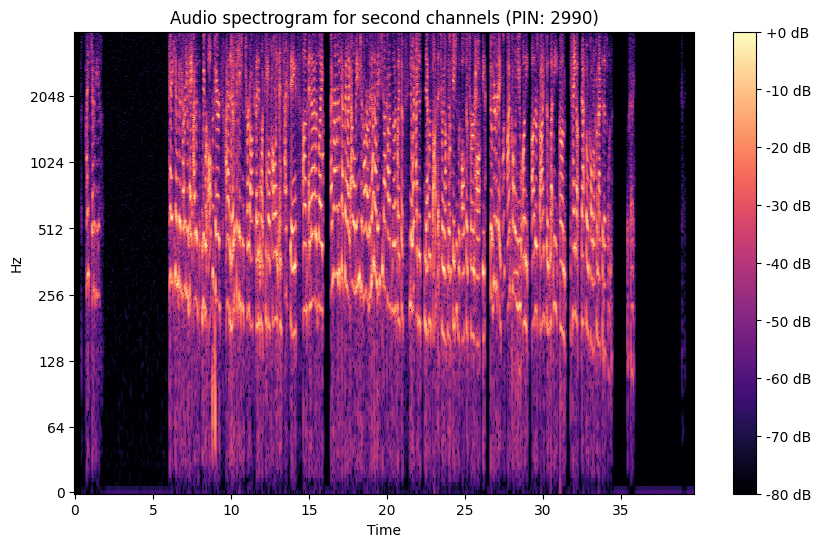

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file with two channels (stereo)
audio_file = "C:/Users/gerga/OneDrive/Desktop/Uni/5 sem/BA project/audioFiles/pin #2990/20210618_150802EDT_PIN2990_VBM_DC-mplex.wav"
y, sr = librosa.load(audio_file, sr=None, mono=False)

# Compute the spectrogram for each channel
D = []
for channel in y:
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(channel)), ref=np.max)
    D.append(spec)

# Convert the list of spectrograms to a 3D NumPy array
D = np.array(D)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D[1], sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Audio spectrogram for second channels (PIN: 2990)')
plt.show()


C:\Users\gerga\python3.10\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


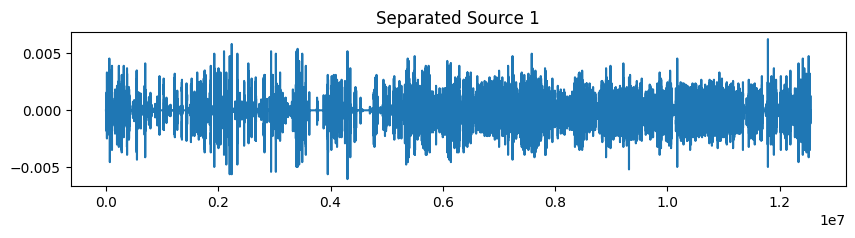

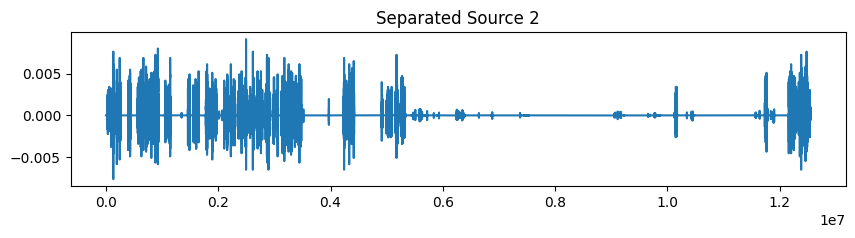

In [15]:


# Load the multichannel audio file
audio_file = "20220829_090036EDT_PIN2411_VBM_DC-mplex.wav"
audio, sample_rate = sf.read(audio_file)

audio = audio.reshape(-1, 2)

# Perform Independent Component Analysis (ICA)
ica = FastICA(n_components=len(audio.T), max_iter=2000)
sources = ica.fit_transform(audio)

# Visualize and inspect the separated sources
import matplotlib.pyplot as plt

for i, source in enumerate(sources.T):
    plt.figure(figsize=(10, 2))
    plt.plot(source)
    plt.title(f"Separated Source {i+1}")
    plt.show()


In [20]:
# Generate the spectrogram
spectrogram = librosa.stft(audio)

# Convert the magnitude spectrogram to decibels
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))


ValueError: For X (1026) and Y (3) with flat shading, A should have shape (2, 1025, 3) or (2, 1025, 4) or (2, 1025) or (2050,), not (2, 1025, 24512)

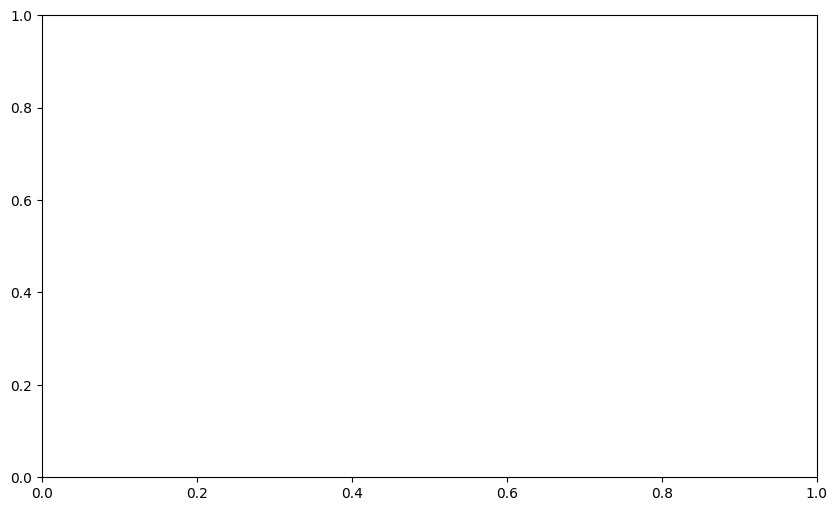

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
